In [1]:
# importing all necessary libraries
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from xgboost import XGBClassifier
from sklearn import metrics    
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [2]:
# Reading csv file
df = pd.read_csv('loancwith category.csv')

In [3]:
#printing top 10 data elements of the dataframe
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,months,interest_rate,Monthly Installment,Total amount to pay,emp_title,...,debit_to_inc_ratio,earliest_cr_line,inq_last_6mths,revol_bal,revol_util,out_prncp,out_prncp_inv,total_pymnt,% of payback,category
0,1077501,1296599,5000,5000,4975.00000,36,10.65,162.87,5863.32,NaN,...,27.65,Jan-85,1.0,13648,83.70,0.00,0.00,5861.07,100,very good
1,1077430,1314167,2500,2500,2500.00000,60,15.27,59.83,3589.80,Ryder,...,1.00,Apr-99,5.0,1687,9.40,0.00,0.00,1008.71,28,Very Poor
2,1077175,1313524,2400,2400,2400.00000,36,15.96,84.33,3035.88,NaN,...,8.72,1-Nov,2.0,2956,98.50,0.00,0.00,3003.65,99,very good
3,1076863,1277178,10000,10000,10000.00000,36,13.49,339.31,12215.16,AIR RESOURCES BOARD,...,20.00,Feb-96,1.0,5598,21.00,0.00,0.00,12226.30,100,excellent
4,1075358,1311748,3000,3000,3000.00000,60,12.69,67.79,4067.40,University Medical Group,...,17.94,Jan-96,0.0,27783,53.90,766.90,766.90,3242.17,80,poor
5,1075269,1311441,5000,5000,5000.00000,36,7.90,156.46,5632.56,Veolia Transportaton,...,11.20,4-Nov,3.0,7963,28.30,0.00,0.00,5631.38,100,very good
6,1069639,1304742,7000,7000,7000.00000,60,15.96,170.08,10204.80,Southern Star Photography,...,23.51,5-Jul,1.0,17726,85.60,1889.15,1889.15,8136.84,80,poor
7,1072053,1288686,3000,3000,3000.00000,36,18.64,109.43,3939.48,MKC Accounting,...,5.35,7-Jan,2.0,8221,87.50,0.00,0.00,3938.14,100,very good
8,1071795,1306957,5600,5600,5600.00000,60,21.28,152.39,9143.40,NaN,...,5.55,4-Apr,2.0,5210,32.60,0.00,0.00,646.02,7,Very Poor
9,1071570,1306721,5375,5375,5350.00000,60,12.69,121.45,7287.00,Starbucks,...,18.08,4-Sep,0.0,9279,36.50,0.00,0.00,1476.19,20,Very Poor


In [4]:
#printing column names
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'months', 'interest_rate', 'Monthly Installment', 'Total amount to pay',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'title', 'addr_state',
       'debit_to_inc_ratio', 'earliest_cr_line', 'inq_last_6mths', 'revol_bal',
       'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       '% of payback', 'category'],
      dtype='object')

In [5]:
print(df.dtypes)
print("-------------------------------------------*---------------------------------------")
print("Total count of the differnt datatypes are given below")
print(df.dtypes.value_counts())

id                       int64
member_id                int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
months                   int64
interest_rate          float64
Monthly Installment    float64
Total amount to pay    float64
emp_title               object
emp_length             float64
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
title                   object
addr_state              object
debit_to_inc_ratio     float64
earliest_cr_line        object
inq_last_6mths         float64
revol_bal                int64
revol_util             float64
out_prncp              float64
out_prncp_inv          float64
total_pymnt            float64
% of payback             int64
category                object
dtype: object
-------------------------------------------*---------------------------------------
Total count of the differnt dataty

## Checking for Null Values

In [6]:
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
months                     0
interest_rate              0
Monthly Installment        0
Total amount to pay        0
emp_title              51462
emp_length             44825
home_ownership             0
annual_inc                 4
verification_status        0
loan_status                0
purpose                    0
title                    152
addr_state                 0
debit_to_inc_ratio         0
earliest_cr_line          29
inq_last_6mths            29
revol_bal                  0
revol_util               502
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
% of payback               0
category                   0
dtype: int64

In [7]:
df[df['emp_title'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,months,interest_rate,Monthly Installment,Total amount to pay,emp_title,...,debit_to_inc_ratio,earliest_cr_line,inq_last_6mths,revol_bal,revol_util,out_prncp,out_prncp_inv,total_pymnt,% of payback,category
0,1077501,1296599,5000,5000,4975.00000,36,10.65,162.87,5863.32,NaN,...,27.65,Jan-85,1.0,13648,83.7,0.00,0.00,5861.07,100,very good
2,1077175,1313524,2400,2400,2400.00000,36,15.96,84.33,3035.88,NaN,...,8.72,1-Nov,2.0,2956,98.5,0.00,0.00,3003.65,99,very good
8,1071795,1306957,5600,5600,5600.00000,60,21.28,152.39,9143.40,NaN,...,5.55,4-Apr,2.0,5210,32.6,0.00,0.00,646.02,7,Very Poor
30,1032111,1261745,4375,4375,4375.00000,36,7.51,136.11,4899.96,NaN,...,20.34,Dec-87,0.0,11210,86.9,0.00,0.00,4898.54,100,very good
42,1069314,1304202,3000,3000,3000.00000,36,18.25,108.84,3918.24,NaN,...,17.39,Sep-98,0.0,43936,98.1,0.00,0.00,3915.03,100,very good
61,1068934,1277395,17500,8950,8925.00000,60,17.27,223.74,13424.40,NaN,...,19.47,6-May,1.0,10724,58.9,2462.25,2455.34,10713.52,80,poor
110,1068273,1302680,5500,5500,5500.00000,36,6.62,168.88,6079.68,NaN,...,9.69,Aug-94,0.0,14136,21.9,0.00,0.00,6077.88,100,very good
168,1067644,1302032,2500,2500,2500.00000,36,7.51,77.78,2800.08,NaN,...,16.30,Aug-94,2.0,4853,42.2,0.00,0.00,1838.88,66,Very Poor
186,1067090,1301465,9000,9000,9000.00000,36,10.65,293.16,10553.76,NaN,...,8.89,Sep-98,0.0,7388,71.7,0.00,0.00,10552.79,100,very good
199,1061877,1293509,20000,20000,20000.00000,36,13.49,678.61,24429.96,NaN,...,22.38,Nov-98,1.0,19548,90.8,0.00,0.00,23861.58,98,very good


In [8]:
df.notnull().head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,months,interest_rate,Monthly Installment,Total amount to pay,emp_title,...,debit_to_inc_ratio,earliest_cr_line,inq_last_6mths,revol_bal,revol_util,out_prncp,out_prncp_inv,total_pymnt,% of payback,category
0,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [9]:
df.shape

(887379, 28)

In [10]:
df.isna().sum().sum()

97003

In [11]:
df = df.fillna(df.mode().iloc[0])

In [12]:
df.shape

(887379, 28)

In [13]:
df.isnull().sum()

id                     0
member_id              0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
months                 0
interest_rate          0
Monthly Installment    0
Total amount to pay    0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
title                  0
addr_state             0
debit_to_inc_ratio     0
earliest_cr_line       0
inq_last_6mths         0
revol_bal              0
revol_util             0
out_prncp              0
out_prncp_inv          0
total_pymnt            0
% of payback           0
category               0
dtype: int64

## total number of classes 


In [14]:
pd.unique(df['loan_status'].values.ravel())

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [15]:
print("Amount of Classes: ", len(pd.unique(df['loan_status'].values.ravel())))

Amount of Classes:  10


In [16]:
for col in df.select_dtypes(include=['object']).columns:
    print ("Column {} has {} unique instances".format( col, len(df[col].unique())) )

Column emp_title has 299263 unique instances
Column home_ownership has 6 unique instances
Column verification_status has 3 unique instances
Column loan_status has 10 unique instances
Column purpose has 14 unique instances
Column title has 63076 unique instances
Column addr_state has 51 unique instances
Column earliest_cr_line has 697 unique instances
Column category has 6 unique instances


In [17]:
df = df.drop('emp_title', 1) #
df = df.drop('title', 1)#
df = df.drop('purpose', 1)#
df = df.drop('addr_state', 1)#

In [18]:
df.shape

(887379, 24)

In [19]:
for col in df.select_dtypes(include=['object']).columns:
    print ("Column {} has {} unique instances".format( col, len(df[col].unique())) )

Column home_ownership has 6 unique instances
Column verification_status has 3 unique instances
Column loan_status has 10 unique instances
Column earliest_cr_line has 697 unique instances
Column category has 6 unique instances


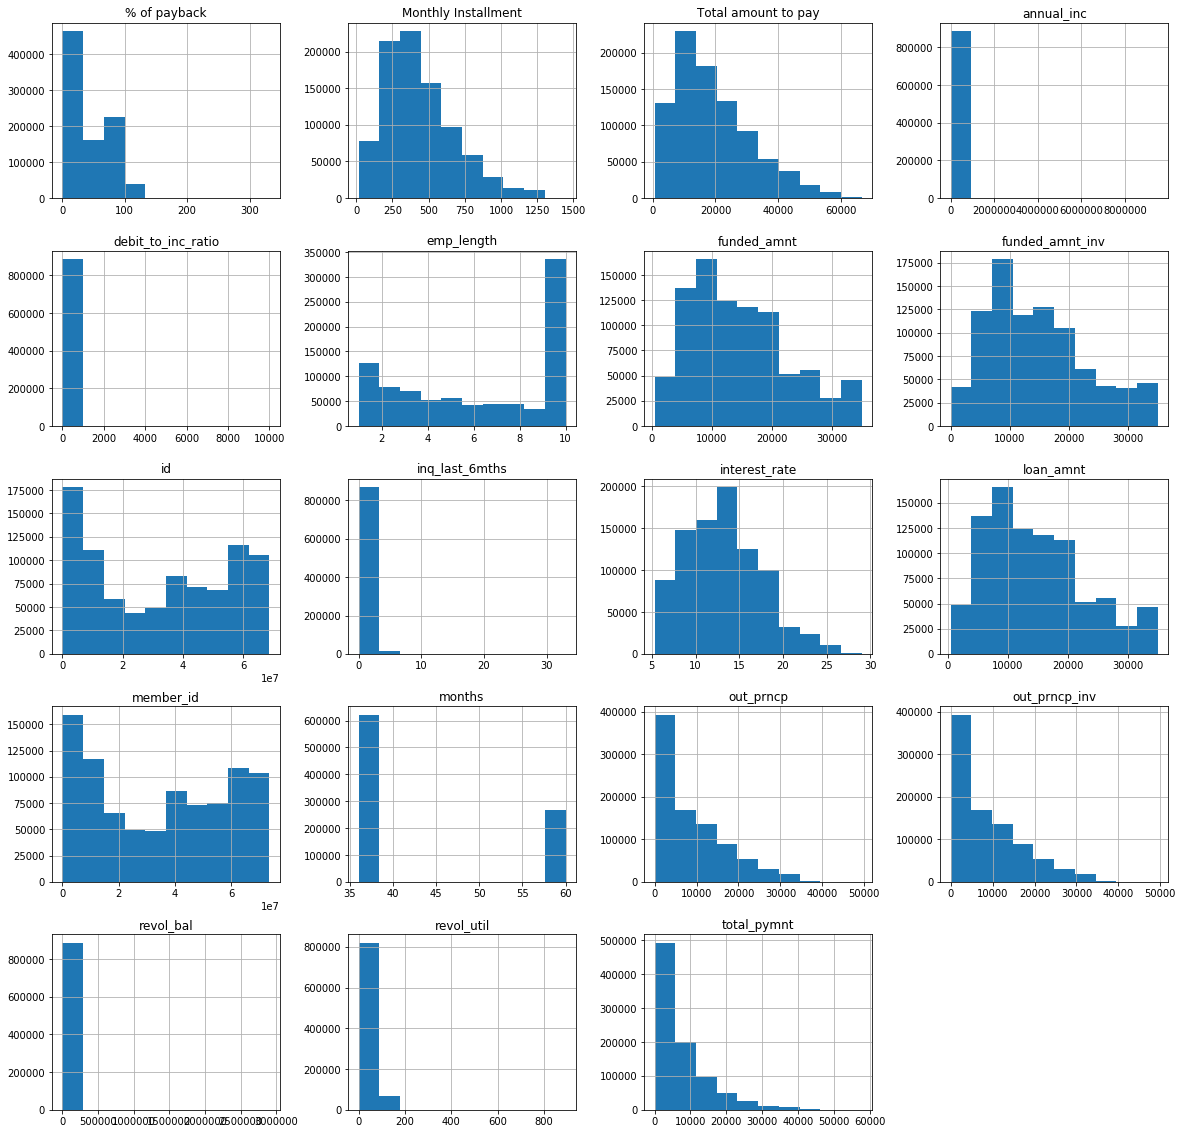

In [20]:
# Plot histograms of each parameter 
df.hist(figsize = (20, 20))
plt.show()

## Exploratory Data Analysis: What is the distribution of the loan amount?


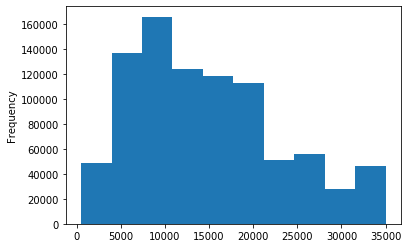

In [21]:
df['loan_amnt'].plot(kind="hist", bins=10)

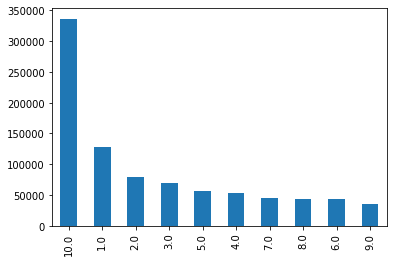

In [22]:
df['emp_length'].value_counts().plot(kind='bar')

## What is the distribution of target class?


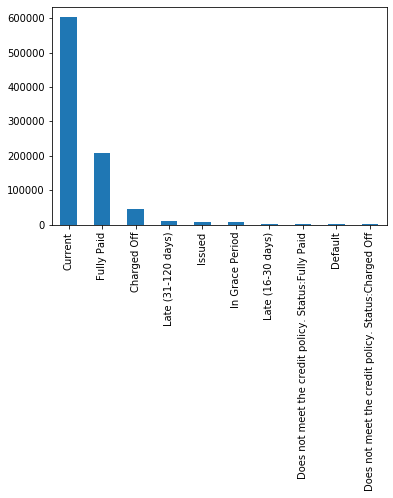

In [23]:
df['loan_status'].value_counts().plot(kind='bar')

In [24]:
df._get_numeric_data().columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'months', 'interest_rate', 'Monthly Installment', 'Total amount to pay',
       'emp_length', 'annual_inc', 'debit_to_inc_ratio', 'inq_last_6mths',
       'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       '% of payback'],
      dtype='object')

In [25]:
df.select_dtypes(include=['object']).columns

Index(['home_ownership', 'verification_status', 'loan_status',
       'earliest_cr_line', 'category'],
      dtype='object')

In [26]:
# Number of unique classes in each object column
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

home_ownership           6
verification_status      3
loan_status             10
earliest_cr_line       697
category                 6
dtype: int64

In [27]:
cat = df.select_dtypes('object')

In [28]:
print("....................................................................")
print(cat.verification_status.value_counts())
print("....................................................................")
print(cat.loan_status.value_counts())
print("....................................................................")
print(cat.earliest_cr_line.value_counts())
print("....................................................................")


....................................................................
Source Verified    329558
Verified           291071
Not Verified       266750
Name: verification_status, dtype: int64
....................................................................
Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64
....................................................................
1-Aug     6688
Aug-00  

In [38]:
X = df.drop("category", axis=1, inplace = False)
y = df.category

In [39]:
X.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,months,interest_rate,Monthly Installment,Total amount to pay,emp_length,...,loan_status,debit_to_inc_ratio,earliest_cr_line,inq_last_6mths,revol_bal,revol_util,out_prncp,out_prncp_inv,total_pymnt,% of payback
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,5863.32,10.0,...,Fully Paid,27.65,Jan-85,1.0,13648,83.7,0.00,0.00,5861.07,100
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,3589.80,1.0,...,Charged Off,1.00,Apr-99,5.0,1687,9.4,0.00,0.00,1008.71,28
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,3035.88,10.0,...,Fully Paid,8.72,1-Nov,2.0,2956,98.5,0.00,0.00,3003.65,99
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,12215.16,10.0,...,Fully Paid,20.00,Feb-96,1.0,5598,21.0,0.00,0.00,12226.30,100
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,4067.40,1.0,...,Current,17.94,Jan-96,0.0,27783,53.9,766.90,766.90,3242.17,80
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,5632.56,3.0,...,Fully Paid,11.20,4-Nov,3.0,7963,28.3,0.00,0.00,5631.38,100
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,10204.80,8.0,...,Current,23.51,5-Jul,1.0,17726,85.6,1889.15,1889.15,8136.84,80
7,1072053,1288686,3000,3000,3000.0,36,18.64,109.43,3939.48,9.0,...,Fully Paid,5.35,7-Jan,2.0,8221,87.5,0.00,0.00,3938.14,100
8,1071795,1306957,5600,5600,5600.0,60,21.28,152.39,9143.40,4.0,...,Charged Off,5.55,4-Apr,2.0,5210,32.6,0.00,0.00,646.02,7
9,1071570,1306721,5375,5375,5350.0,60,12.69,121.45,7287.00,1.0,...,Charged Off,18.08,4-Sep,0.0,9279,36.5,0.00,0.00,1476.19,20


## Encoding Categorical Variables
##### A machine learning model unfortunately cannot deal with categorical variables (except for some models such as LightGBM). Therefore, we have to find a way to encode (represent) these variables as numbers before handing them off to the model. There are two main ways to carry out this process:

#####  * Label encoding: assign each unique category in a categorical variable with an integer. No new columns are created. An example is shown below

#####  * One-hot encoding: create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.

## &
## Feature Selection
### UNIVIRATE feature selection
### we are doing statistical tests to select those features thats have the strongest relationship with the output variable.
### we are performing chi-squared statistical test for non-negative features to select 10 of the best features from the categorize credit risk


In [59]:
cat_1hot = pd.get_dummies(cat,sparse=True)

In [60]:
non_cat = df.select_dtypes(exclude = 'object')

In [61]:
data_1hot = pd.concat([non_cat, cat_1hot], axis=1, join='inner')

In [62]:
data_1hot.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,months,interest_rate,Monthly Installment,Total amount to pay,emp_length,...,earliest_cr_line_Sep-96,earliest_cr_line_Sep-97,earliest_cr_line_Sep-98,earliest_cr_line_Sep-99,category_Very Poor,category_excellent,category_fair,category_good,category_poor,category_very good
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,5863.32,10.0,...,0,0,0,0,0,0,0,0,0,1
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,3589.80,1.0,...,0,0,0,0,1,0,0,0,0,0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,3035.88,10.0,...,0,0,0,0,0,0,0,0,0,1
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,12215.16,10.0,...,0,0,0,0,0,1,0,0,0,0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,4067.40,1.0,...,0,0,0,0,0,0,0,0,1,0


In [63]:
###features selection univirate.
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("loancwith category.csv")
X = data_1hot.iloc[:,0:20] #independent columns 
y = data_1hot.iloc[:,-1] #target column i.e price range

In [64]:
data_1hot.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,months,interest_rate,Monthly Installment,Total amount to pay,emp_length,...,earliest_cr_line_Sep-96,earliest_cr_line_Sep-97,earliest_cr_line_Sep-98,earliest_cr_line_Sep-99,category_Very Poor,category_excellent,category_fair,category_good,category_poor,category_very good
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,5863.32,10.0,...,0,0,0,0,0,0,0,0,0,1
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,3589.80,1.0,...,0,0,0,0,1,0,0,0,0,0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,3035.88,10.0,...,0,0,0,0,0,0,0,0,0,1
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,12215.16,10.0,...,0,0,0,0,0,1,0,0,0,0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,4067.40,1.0,...,0,0,0,0,0,0,0,0,1,0


In [65]:
#apply SelectKBest class to extract top 10 best features 
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [66]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 

In [67]:
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs', 'Score'] #naming the dataframe columns

In [68]:
featureScores

,Specs,Score
0,id,2.462449e+12
1,member_id,2.593713e+12
2,loan_amnt,4.866584e+07
3,funded_amnt,5.045182e+07
4,funded_amnt_inv,5.523282e+07
5,months,8.814193e+04
6,interest_rate,1.804839e+04
7,Monthly Installment,4.712072e+05
8,Total amount to pay,1.201434e+08
9,emp_length,3.232669e+03


In [69]:
print(featureScores.nlargest(10, 'Score')) #print 10 best features

                  Specs         Score
1             member_id  2.593713e+12
0                    id  2.462449e+12
15            out_prncp  8.147725e+08
16        out_prncp_inv  8.144436e+08
17          total_pymnt  5.558360e+08
8   Total amount to pay  1.201434e+08
4       funded_amnt_inv  5.523282e+07
3           funded_amnt  5.045182e+07
2             loan_amnt  4.866584e+07
13            revol_bal  1.801233e+07


In [70]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

C:\Users\Ricky\Anaconda3\envs\ml projet\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [71]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.13783937 0.11527464 0.01209907 0.01218313 0.01360185 0.04446334
 0.02835553 0.02493847 0.01915384 0.00820456 0.00977233 0.01120324
 0.00688304 0.009656   0.0106324  0.07388318 0.06465321 0.07051342
 0.32668937 0.        ]


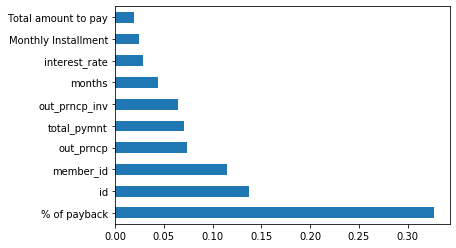

In [72]:
#plot graph of features importances for better visulization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [73]:
X = data.drop("category", axis=1, inplace = False)
y = data.category

In [74]:
y.head()

0    very good
1    Very Poor
2    very good
3    excellent
4         poor
Name: category, dtype: object

## Scale the continuous variables use min max calculation

In [75]:
# impute rows with NaN with a 0 for now
X2 = X.fillna(value = 0)
X2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,months,interest_rate,Monthly Installment,Total amount to pay,emp_title,...,addr_state,debit_to_inc_ratio,earliest_cr_line,inq_last_6mths,revol_bal,revol_util,out_prncp,out_prncp_inv,total_pymnt,% of payback
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,5863.32,0,...,AZ,27.65,Jan-85,1.0,13648,83.7,0.0,0.0,5861.07,100
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,3589.80,Ryder,...,GA,1.00,Apr-99,5.0,1687,9.4,0.0,0.0,1008.71,28
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,3035.88,0,...,IL,8.72,1-Nov,2.0,2956,98.5,0.0,0.0,3003.65,99
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,12215.16,AIR RESOURCES BOARD,...,CA,20.00,Feb-96,1.0,5598,21.0,0.0,0.0,12226.30,100
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,4067.40,University Medical Group,...,OR,17.94,Jan-96,0.0,27783,53.9,766.9,766.9,3242.17,80


In [77]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()

X2[['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'months', 'interest_rate', 'Monthly Installment', 'Total amount to pay',
       'emp_length', 'annual_inc', 'debit_to_inc_ratio', 'inq_last_6mths',
       'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       '% of payback']] = Scaler.fit_transform(X2[['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'months', 'interest_rate', 'Monthly Installment', 'Total amount to pay',
       'emp_length', 'annual_inc', 'debit_to_inc_ratio', 'inq_last_6mths',
       'revol_bal', 'revol_util', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       '% of payback']])

C:\Users\Ricky\Anaconda3\envs\ml projet\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [78]:
X2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,months,interest_rate,Monthly Installment,Total amount to pay,emp_title,...,addr_state,debit_to_inc_ratio,earliest_cr_line,inq_last_6mths,revol_bal,revol_util,out_prncp,out_prncp_inv,total_pymnt,% of payback
0,0.014917,0.016688,0.130435,0.130435,0.142143,0.0,0.225180,0.102952,0.080192,0,...,AZ,0.002765,Jan-85,0.030303,0.004698,0.093803,0.000000,0.000000,0.101442,0.301205
1,0.014916,0.016927,0.057971,0.057971,0.071429,1.0,0.420363,0.030886,0.045787,Ryder,...,GA,0.000100,Apr-99,0.151515,0.000581,0.010535,0.000000,0.000000,0.017459,0.084337
2,0.014913,0.016918,0.055072,0.055072,0.068571,0.0,0.449514,0.048021,0.037405,0,...,IL,0.000872,1-Nov,0.060606,0.001018,0.110389,0.000000,0.000000,0.051986,0.298193
3,0.014908,0.016423,0.275362,0.275362,0.285714,0.0,0.345163,0.226355,0.176313,AIR RESOURCES BOARD,...,CA,0.002000,Feb-96,0.030303,0.001927,0.023535,0.000000,0.000000,0.211610,0.301205
4,0.014886,0.016894,0.072464,0.072464,0.085714,1.0,0.311365,0.036453,0.053015,University Medical Group,...,OR,0.001794,Jan-96,0.000000,0.009564,0.060406,0.015533,0.015533,0.056115,0.240964


## Partition the data into train and testing

In [79]:
x_train, x_test, y_train, y_test = train_test_split(X2, y, test_size=.3, random_state=123)

In [80]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(621165, 27)
(621165,)
(266214, 27)
(266214,)


## Building the k Nearest Neighbor Classifier


In [81]:
# start out with the number of classes for neighbors
data_knn = KNeighborsClassifier(n_neighbors = 10, metric='euclidean')
data_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [82]:
data_knn.fit(x_train, y_train)

ValueError: could not convert string to float: 'Probate judge/clerk and master'

In [83]:
data_knn.predict(x_test)

ValueError: could not convert string to float: 'Vice President'

In [52]:
# R-square from training and test data
rsquared_train = data_knn.score(x_train, y_train)
rsquared_test = data_knn.score(x_test, y_test)
print ('Training data R-squared:')
print(rsquared_train)
print ('Test data R-squared:')
print(rsquared_test)

ValueError: could not convert string to float: 'MORTGAGE'

In [53]:
# confusion matrix

from sklearn.metrics import confusion_matrix

knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = data_knn.predict(x_test))
print("The Confusion matrix:\n", knn_confusion_matrix)

ValueError: could not convert string to float: 'MORTGAGE'

In [54]:
# visualize the confusion matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
plt.matshow(knn_confusion_matrix, cmap = plt.cm.Blues)
plt.title("KNN Confusion Matrix\n")
#plt.xticks([0,1], ['No', 'Yes'])
#plt.yticks([0,1], ['No', 'Yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
for y in range(knn_confusion_matrix.shape[0]):
    for x in range(knn_confusion_matrix.shape[1]):
        plt.text(x, y, '{}'.format(knn_confusion_matrix[y, x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()

NameError: name 'knn_confusion_matrix' is not defined

In [55]:
#Generate the classification report
from sklearn.metrics import classification_report
knn_classify_report = classification_report(y_true = y_test, 
                                           y_pred = data_knn.predict(x_test))
print(knn_classify_report)

ValueError: could not convert string to float: 'MORTGAGE'

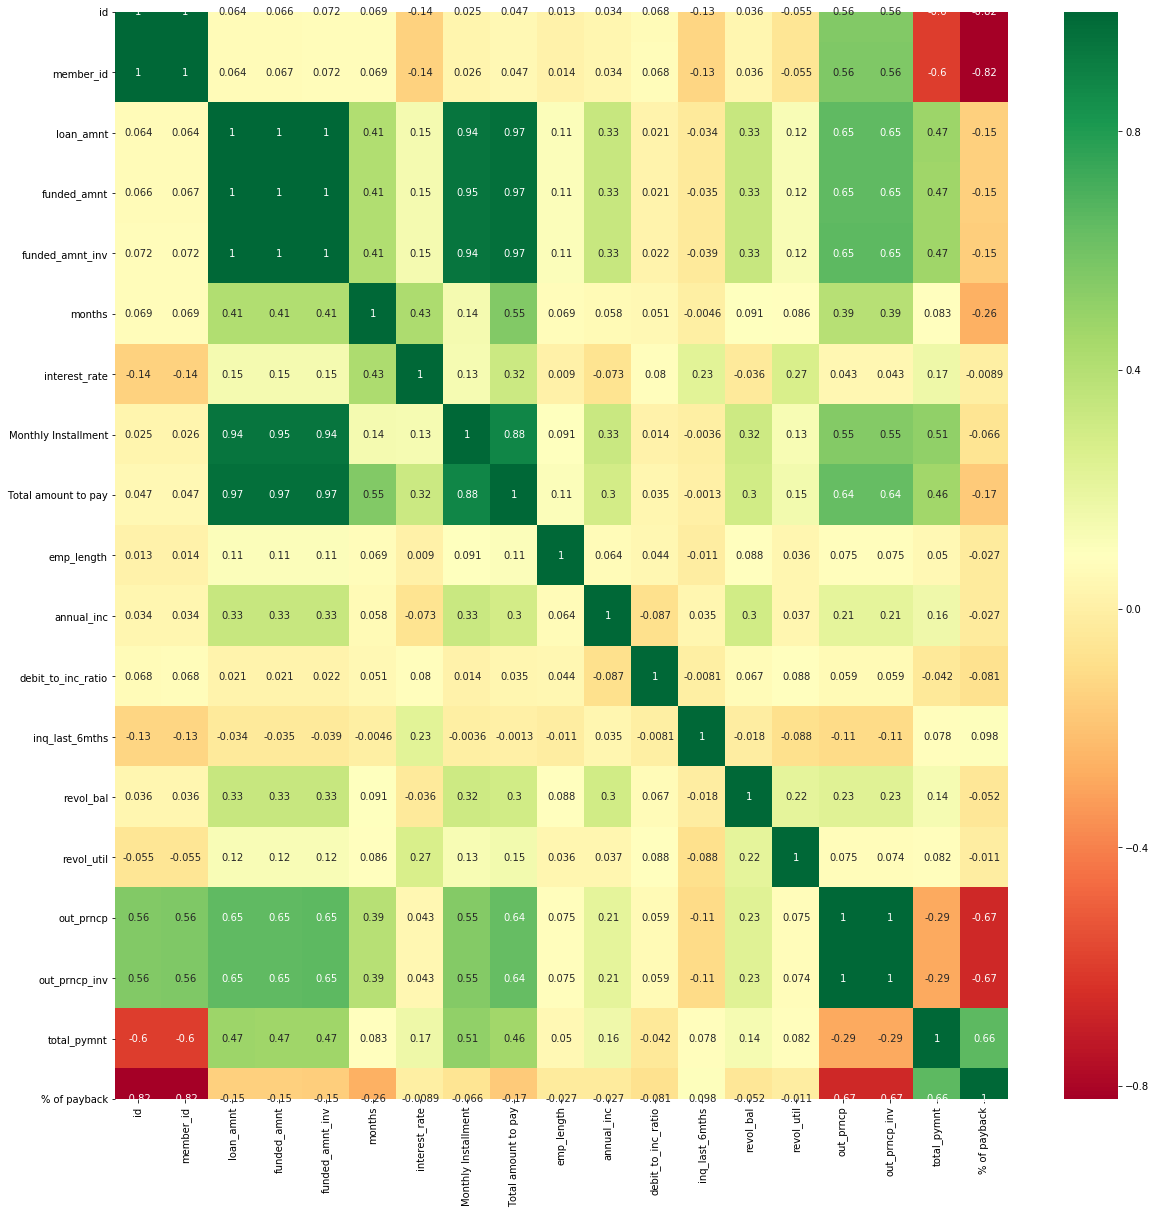

In [84]:
import seaborn as sns
#get correlations of each features in dataset
data = pd.read_csv("loancwith category.csv")
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig('heatmap.png')
## credit_amount has quite strong relationship with duration.